# scqubits example: the fluxonium qubit
J. Koch and P. Groszkowski

For further documentation of scqubits see https://scqubits.readthedocs.io/en/latest/.

---

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import numpy as np
import scqubits as scq

# Fluxonium qubit

$H_\text{fl}=-4E_\text{C}\partial_\phi^2-E_\text{J}\cos(\phi-\varphi_\text{ext}) +\frac{1}{2}E_L\phi^2$

**Creation via GUI** (ipywidgets needs to be installed for this to work.)

In [2]:
fluxonium = scq.Fluxonium.create()

Output()

In [3]:
print(fluxonium)

Fluxonium-----------|
                    | EJ: 8.9
                    | EC: 2.5
                    | EL: 0.5
                    | flux: 0.0
                    | cutoff: 110
                    | truncated_dim: 10
                    |
                    | dim: 110



**Programmatic creation**

In [4]:
fluxonium2 = scq.Fluxonium(
    EJ=8.9,
    EC=2.5,
    EL=0.5,
    cutoff = 110,
    flux = 0.5
)

## Computing and visualizing spectra

In [5]:
fluxonium.eigenvals()

array([-4.28338463,  4.47506063,  4.69616798,  6.71864972, 12.64960539,
       15.28847499])

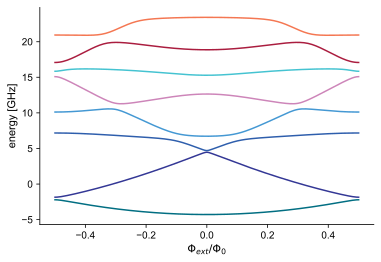

In [6]:
flux_list = np.linspace(-0.5, 0.5, 151)
fluxonium.plot_evals_vs_paramvals('flux', flux_list, evals_count=8);

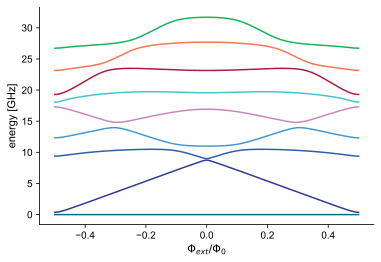

In [7]:
fluxonium.plot_evals_vs_paramvals('flux', flux_list, evals_count=9, subtract_ground=True);

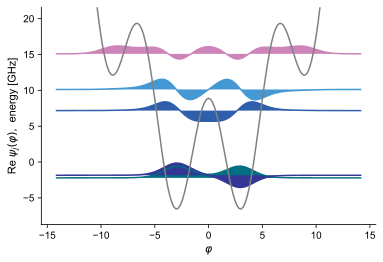

In [8]:
fluxonium.flux = 0.5
fluxonium.plot_wavefunction(esys=None, which=range(5), mode='real');

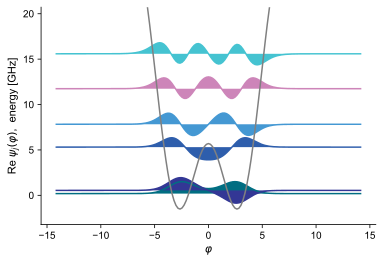

In [9]:
fluxonium = scq.Fluxonium(
    EJ=5.7,
    EC=1.2,
    EL=1.0,
    cutoff = 150,
    flux = 0.5
)
fig, axes=fluxonium.plot_wavefunction(esys=None, which=[0,1,2,3,4,5], mode='real');

## Matrix elements

In [10]:
phimat = fluxonium.matrixelement_table('phi_operator', evals_count=10)
print(phimat)

[[-1.14889206e-14 -2.42020774e+00  2.91124950e-15  5.96669304e-01
   3.28193117e-16  1.26034410e-02 -7.32438373e-17  1.05152531e-02
   2.26788868e-16  2.08796925e-03]
 [-2.42020774e+00  1.18214002e-14  1.16100233e+00 -2.38607982e-15
   1.98939356e-01 -6.52868173e-16  1.96392027e-02 -6.42886476e-17
  -1.88229452e-03  1.02294016e-15]
 [ 2.91124950e-15  1.16100233e+00 -1.78674881e-15 -2.02810531e+00
   2.63327998e-17 -2.87499531e-01  7.69279791e-16 -3.19256763e-02
  -7.83074338e-16 -1.96457721e-04]
 [ 5.96669304e-01 -2.38607982e-15 -2.02810531e+00  2.59697271e-16
  -2.11221368e+00 -2.06274748e-15  1.78076985e-01 -5.78795756e-16
   4.52028150e-02 -1.52313017e-15]
 [ 3.28193117e-16  1.98939356e-01  2.63327998e-17 -2.11221368e+00
   4.81404363e-15 -2.41344721e+00  2.30356200e-15  1.41490331e-01
  -1.31775679e-15  5.74957935e-02]
 [ 1.26034410e-02 -6.52868173e-16 -2.87499531e-01 -2.06274748e-15
  -2.41344721e+00  2.93027212e-15  2.65902027e+00 -4.92672758e-15
  -7.06894388e-02  3.08698525e-15

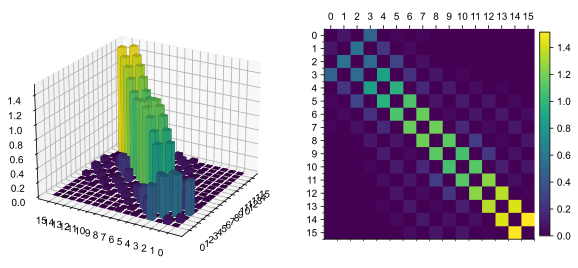

In [11]:
fluxonium.plot_matrixelements('n_operator', evals_count=16);

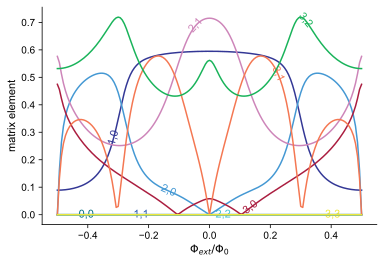

In [12]:
fluxonium.plot_matelem_vs_paramvals('n_operator', 'flux', flux_list, select_elems=4);